# Autoencoder
- MNIST
- Neural Network
- 1 hidden layers

In [1]:
!pip install torch torchvision

## 1. Settings
### 1) Import required libraries

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision.utils import save_image
import matplotlib.pyplot as plt

### 2) Set hyperparameters

In [132]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 5

## 2. Data

### 1) Download Data

In [133]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



### 2) Set DataLoader

In [134]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 4. Model & Optimizer
### 1) Model

In [135]:
# 인공신경망으로 이루어진 오토엔코더를 생성합니다.
# 단순하게 하기 위해 활성화 함수는 생략했습니다.
class Autoencoder(nn.Module):
      ############# 실습 코드 작성 ###############
      def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = nn.Linear(28*28,20)
        self.decoder = nn.Linear(20, 28*28)
      def forward(self, x):
        x = x.view(batch_size, -1)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size, 1, 28, 28)
        return out
      ############# 실습 코드 작성 ###############

### 2) Loss func & Optimizer

In [136]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

############# 실습 코드 작성 ###############
model = Autoencoder().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
############# 실습 코드 작성 ###############

cuda:0


## 5. Train 

In [137]:
loss_arr =[]
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,x)
        loss.backward()
        optimizer.step()
        
    if j % 1000 == 0:
        print(loss)
        loss_arr.append(loss.cpu().data.numpy()[0])

## 6. Check with Train Image

torch.Size([256, 28, 28])


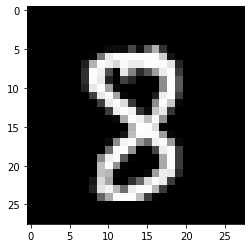

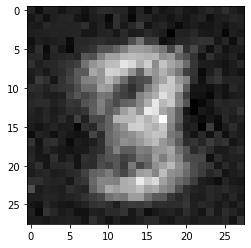

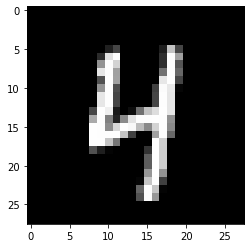

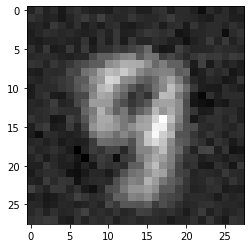

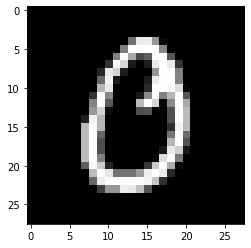

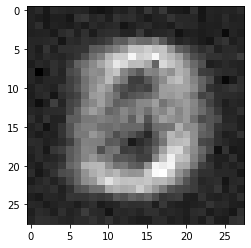

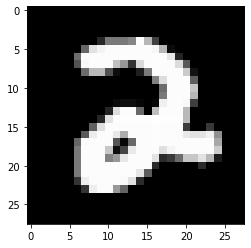

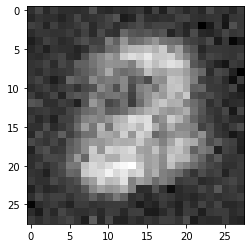

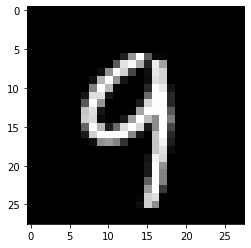

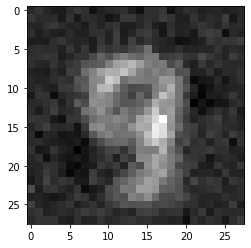

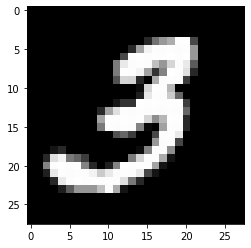

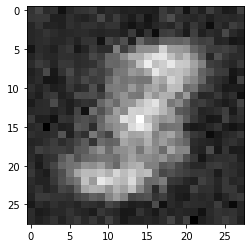

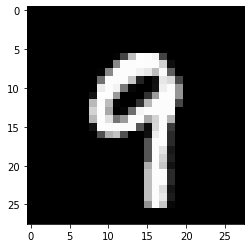

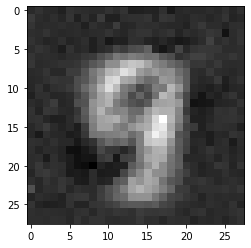

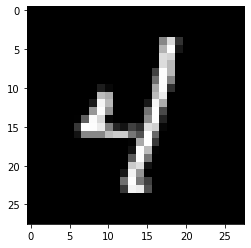

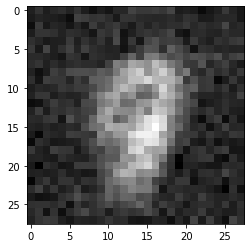

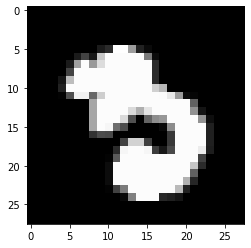

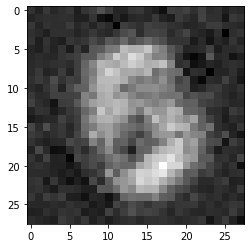

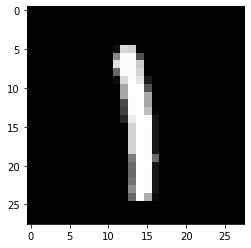

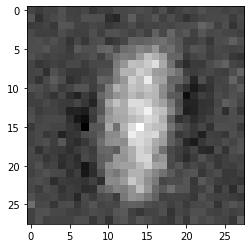

In [138]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

# Convolutional Autoencoder
- MNIST dataset
- Convolutional Neural Network
- 2 hidden layers

In [139]:
!pip install torch torchvision

## 1. Settings
### 1) Import required libraries

In [140]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

### 2) Set hyperparameters

In [141]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 5

## 2. Data

### 1) Download Data

In [142]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

### 2) Set DataLoader

In [143]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 4. Model & Optimizer
### 1) Model

In [144]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        
        ############# 실습 코드 작성 ###############
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU()
        )
        ############# 실습 코드 작성 ###############
                
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out
    


In [145]:
class Decoder(nn.Module):
    def __init__(self):
      
        ############# 실습 코드 작성 ###############
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, 2, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, 3, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(64, 16, 3, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 1, 3, 2, 1, 1),
            nn.ReLU()
        )
        ############# 실습 코드 작성 ###############


    def forward(self,x):
        out = x.view(batch_size,256,7,7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out



### 2) Loss func & Optimizer

In [146]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

encoder = Encoder().to(device)
decoder = Decoder().to(device)

# 인코더 디코더의 파라미터를 동시에 학습시키기 위해 이를 묶는 방법입니다.
parameters = list(encoder.parameters())+ list(decoder.parameters())

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

cuda:0


## 5. Train 

In [147]:
# 모델을 불러오는 방법입니다.
# 크게 두가지 방법이 있는데 여기 사용된 방법은 좀 단순한 방법입니다.
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

try:
    encoder, decoder = torch.load('./model/conv_autoencoder.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
      
        ############# 실습 코드 작성 ###############
        optimizer.zero_grad()
        image = image.to(device)
        output = encoder(image)
        output = decoder(output)
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()
        ############# 실습 코드 작성 ###############
        
    if j % 10 == 0:
        # 모델 저장하는 방법
        # 이 역시 크게 두가지 방법이 있는데 여기 사용된 방법은 좀 단순한 방법입니다.
        # https://pytorch.org/tutorials/beginner/saving_loading_models.html
        torch.save([encoder,decoder],'./model/conv_autoencoder.pkl')
        print(loss)



--------model not restored--------



## 6. Check with Train Image

torch.Size([256, 28, 28])


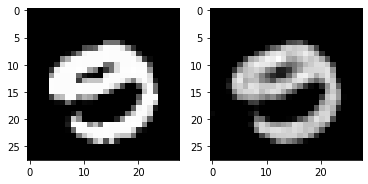

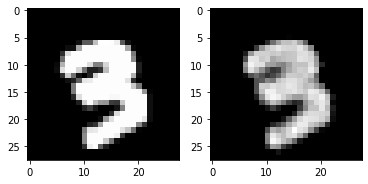

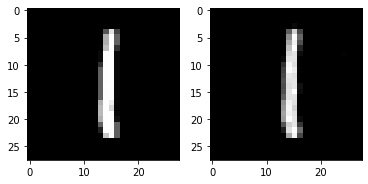

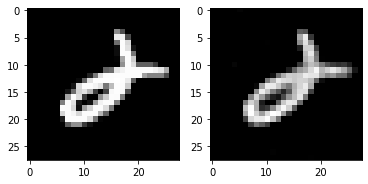

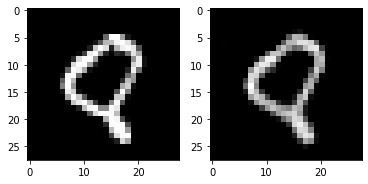

In [ ]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    plt.subplot(1,2,1)
    plt.imshow(torch.squeeze(image[i]).cpu().numpy(),cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

In [ ]:
with torch.no_grad():
    for j,[image,label] in enumerate(test_loader):
       
        image = image.to(device)
        output = encoder(image)
        output = decoder(output)
        
    if j % 10 == 0:
        print(loss)        

torch.Size([256, 28, 28])


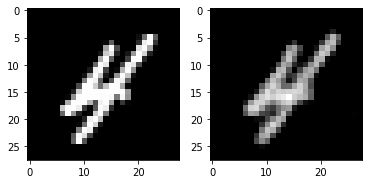

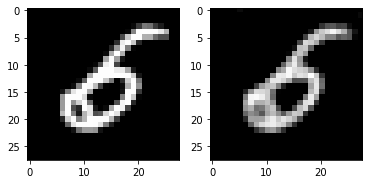

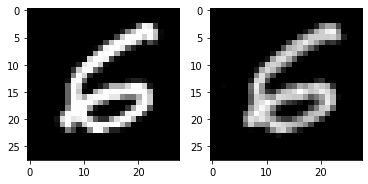

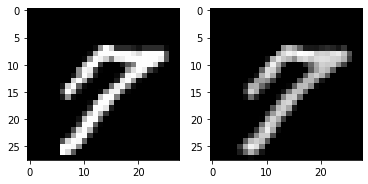

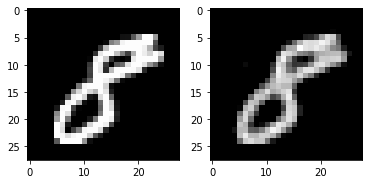

In [ ]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    plt.subplot(1,2,1)
    plt.imshow(torch.squeeze(image[i]).cpu().numpy(),cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

# U-Net Architecture

![대체 텍스트](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

In [ ]:
import torch.nn as nn
import torch
import torch.utils as utils
import torch.nn.init as init
import torch.utils.data as data
import torchvision.utils as v_utils
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [ ]:
# 자주 쓰는 연산들과 항상 세트로 쓰는 연산들은 편의를 위해 함수로 정의해 놓습니다.

############# 실습 코드 작성 ###############
def conv_block(in_dim, out_dim, act_fn):
  model = nn.Sequential(
      nn.Conv2d(in_dim, out_dim, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(out_dim),
      act_fn,
  )
  return model

def conv_trans_block(in_dim, out_dim, act_fn):
  model = nn.Sequential(
      nn.ConvTranspose2d(in_dim, out_dim, kernel_size=3, stride=2, padding=1, output_padding=1),
      nn.BatchNorm2d(out_dim),
      act_fn,
  )
  return model

def maxpool():
  pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
  return pool
############# 실습 코드 작성 ###############


def conv_block_2(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        conv_block(in_dim,out_dim,act_fn),
        nn.Conv2d(out_dim,out_dim, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_dim),
    )
    return model   

In [ ]:
class UnetGenerator(nn.Module):
    def __init__(self,in_dim,out_dim,num_filter):
        super(UnetGenerator,self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.num_filter = num_filter
        act_fn = nn.LeakyReLU(0.2, inplace=True)

        print("\n------Initiating U-Net------\n")

        self.down_1 = conv_block_2(self.in_dim,self.num_filter,act_fn)
        self.pool_1 = maxpool()
        self.down_2 = conv_block_2(self.num_filter*1,self.num_filter*2,act_fn)
        self.pool_2 = maxpool()
        self.down_3 = conv_block_2(self.num_filter*2,self.num_filter*4,act_fn)
        self.pool_3 = maxpool()
        self.down_4 = conv_block_2(self.num_filter*4,self.num_filter*8,act_fn)
        self.pool_4 = maxpool()

        self.bridge = conv_block_2(self.num_filter*8,self.num_filter*16,act_fn)

        self.trans_1 = conv_trans_block(self.num_filter*16,self.num_filter*8,act_fn)
        self.up_1 = conv_block_2(self.num_filter*16,self.num_filter*8,act_fn)
        self.trans_2 = conv_trans_block(self.num_filter*8,self.num_filter*4,act_fn)
        self.up_2 = conv_block_2(self.num_filter*8,self.num_filter*4,act_fn)
        self.trans_3 = conv_trans_block(self.num_filter*4,self.num_filter*2,act_fn)
        self.up_3 = conv_block_2(self.num_filter*4,self.num_filter*2,act_fn)
        self.trans_4 = conv_trans_block(self.num_filter*2,self.num_filter*1,act_fn)
        self.up_4 = conv_block_2(self.num_filter*2,self.num_filter*1,act_fn)

        self.out = nn.Sequential(
            nn.Conv2d(self.num_filter,self.out_dim,3,1,1),
            nn.Tanh(),  #필수는 아님
        )

    def forward(self,input):
        down_1 = self.down_1(input)
        pool_1 = self.pool_1(down_1)
        down_2 = self.down_2(pool_1)
        pool_2 = self.pool_2(down_2)
        down_3 = self.down_3(pool_2)
        pool_3 = self.pool_3(down_3)
        down_4 = self.down_4(pool_3)
        pool_4 = self.pool_4(down_4)

        bridge = self.bridge(pool_4)

        trans_1 = self.trans_1(bridge)
        concat_1 = torch.cat([trans_1,down_4],dim=1)
        up_1 = self.up_1(concat_1)
        trans_2 = self.trans_2(up_1)
        concat_2 = torch.cat([trans_2,down_3],dim=1)
        up_2 = self.up_2(concat_2)
        trans_3 = self.trans_3(up_2)
        concat_3 = torch.cat([trans_3,down_2],dim=1)
        up_3 = self.up_3(concat_3)
        trans_4 = self.trans_4(up_3)
        concat_4 = torch.cat([trans_4,down_1],dim=1)
        up_4 = self.up_4(concat_4)
        out = self.out(up_4)
        return out

In [ ]:
batch_size = 16
img_size = 256
in_dim = 1
out_dim = 3
num_filters = 16

sample_input = torch.ones(size=(batch_size,1,img_size,img_size))

In [ ]:
model = UnetGenerator(in_dim=in_dim,out_dim=out_dim,num_filter=num_filters)
output = model(sample_input)
print(output.size())


------Initiating U-Net------

torch.Size([16, 3, 256, 256])


# 실습 과제

지난 <과제 03. 데이터셋 구성과 분류문제 풀기>에서 여러분이 구성했던 데이터셋과 DataLoader 코드를 사용하여 Convolutional Autoencoder를 구성하시오. 

- 이미지 학습 후 생성 결과를 보일 것





In [53]:
import os
from glob import glob
import pandas as pd
file_path = './data/*.jpg'

file_list = glob(file_path)

In [54]:
data_dict = {'image_name':[], 'class':[], 'target':[], 'file_path':[]}
target_dict = {'data':0}

for path in file_list:
    
    data_dict['file_path'].append(path) # file_path 항목에 파일 경로 저장
    
    path_list = path.split(os.path.sep) # os별 파일 경로 구분 문자로 split
    print(path_list)
    
    data_dict['image_name'].append(path_list[-1])      
    data_dict['class'].append(path_list[-2])
    data_dict['target'].append(target_dict[path_list[-2]])

train_df = pd.DataFrame(data_dict)
print('\n<data frame>\n', train_df)

train_df.to_csv("./data/train.csv", mode='w')

['.', 'data', 'r0_16.jpg']
['.', 'data', 'r0_20.jpg']
['.', 'data', 'r0_38.jpg']
['.', 'data', 'r0_34.jpg']
['.', 'data', 'r0_0.jpg']
['.', 'data', 'r0_2.jpg']
['.', 'data', 'r0_24.jpg']
['.', 'data', 'r0_26.jpg']
['.', 'data', 'r0_12.jpg']
['.', 'data', 'r0_22.jpg']
['.', 'data', 'r0_36.jpg']
['.', 'data', 'r0_28.jpg']
['.', 'data', 'r0_14.jpg']
['.', 'data', 'r0_32.jpg']
['.', 'data', 'r0_10.jpg']
['.', 'data', 'r0_18.jpg']
['.', 'data', 'r0_4.jpg']
['.', 'data', 'r0_30.jpg']
['.', 'data', 'r0_6.jpg']
['.', 'data', 'r0_8.jpg']

<data frame>
    image_name class  target         file_path
0   r0_16.jpg  data       0  ./data/r0_16.jpg
1   r0_20.jpg  data       0  ./data/r0_20.jpg
2   r0_38.jpg  data       0  ./data/r0_38.jpg
3   r0_34.jpg  data       0  ./data/r0_34.jpg
4    r0_0.jpg  data       0   ./data/r0_0.jpg
5    r0_2.jpg  data       0   ./data/r0_2.jpg
6   r0_24.jpg  data       0  ./data/r0_24.jpg
7   r0_26.jpg  data       0  ./data/r0_26.jpg
8   r0_12.jpg  data       0  ./data/

In [55]:
from sklearn.model_selection import train_test_split

def get_df():
    
    # cvs 파일 읽어서 DataFrame으로 저장
    df = pd.read_csv('./data/train.csv')

    # 데이터셋을 train, val, test로 나누기
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=2359)
    df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=2359)
    
    return df_train, df_val, df_test

In [56]:
# 데이터셋 읽어오기
df_train, df_val, df_test = get_df()
print(len(df_train), len(df_val), len(df_test))

12 4 4


In [57]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class Classification_Dataset(Dataset):
    def __init__(self, csv, mode, transform=None):
        self.csv = csv.reset_index(drop=True)  # random으로 섞인 데이터의 인덱스를 reset 시켜서 다시 부여한다.
        self.transform = transform

    def __len__(self):
        return self.csv.shape[0]  # csv 파일의 행 개수 == 데이터 개수

    def __getitem__(self, index):   
        row = self.csv.iloc[index]                       # 주어진 index에 대한 데이터 뽑아오기
        image = Image.open(row.file_path).convert('RGB') # 파일경로로 부터 이미지를 읽고 rgb로 변환하기
        target = torch.tensor(self.csv.iloc[index].target).long()
        
        if self.transform:
            image = self.transform(image) # 이미지에 transform 적용하기

        return image, target  # 이미지와 target return하기

In [71]:
from torchvision import transforms

def get_transforms(image_size):

    transforms_train = transforms.Compose([transforms.Resize(int(image_size*0.4)),
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(image_size),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])
    
    transforms_val = transforms.Compose([transforms.Resize(int(image_size*0.4)),
                                      transforms.CenterCrop(image_size),
                                      transforms.ToTensor()])
    
    return transforms_train, transforms_val

In [72]:
# 모델 트랜스폼 가져오기
transforms_train, transforms_val = get_transforms(28)

In [73]:
# dataset class 객체 만들기
dataset_train = Classification_Dataset(df_train, 'train', transform=transforms_train)
dataset_val = Classification_Dataset(df_val, 'valid', transform=transforms_val)

In [74]:
from torch.utils.data.sampler import RandomSampler
from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=4, sampler=RandomSampler(dataset_train), num_workers=0)
valid_loader = torch.utils.data.DataLoader(dataset_val, batch_size=4, num_workers=0)

In [126]:
batch_size = 4
learning_rate = 0.0003
num_epoch = 15

In [88]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        
        ############# 실습 코드 작성 ###############
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(256, 512, 3, padding=1),
            nn.ReLU()
        )
        ############# 실습 코드 작성 ###############
                
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out
    


In [107]:
class Decoder(nn.Module):
    def __init__(self):
      
        ############# 실습 코드 작성 ###############
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(512, 256, 3, 2, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.ConvTranspose2d(256, 128, 3, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, 3, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(64, 16, 3, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 3, 3, 2, 1, 1),
            nn.ReLU()
        )
        ############# 실습 코드 작성 ###############


    def forward(self,x):
        out = x.view(batch_size,512,7,7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out



In [127]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

encoder = Encoder().to(device)
decoder = Decoder().to(device)

# 인코더 디코더의 파라미터를 동시에 학습시키기 위해 이를 묶는 방법입니다.
parameters = list(encoder.parameters())+ list(decoder.parameters())

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

cuda:0


In [128]:
try:
    encoder, decoder = torch.load('./model/conv_autoencoder.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
      
        ############# 실습 코드 작성 ###############
        optimizer.zero_grad()
        image = image.to(device)
        output = encoder(image)
        output = decoder(output)
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()
        ############# 실습 코드 작성 ###############
        
    if j % 10 == 0:
        # 모델 저장하는 방법
        # 이 역시 크게 두가지 방법이 있는데 여기 사용된 방법은 좀 단순한 방법입니다.
        # https://pytorch.org/tutorials/beginner/saving_loading_models.html
        torch.save([encoder,decoder],'./model/conv_autoencoder.pkl')
        print(loss)


--------model not restored--------



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 3, 28, 28])


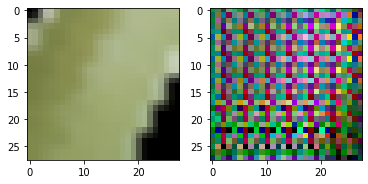

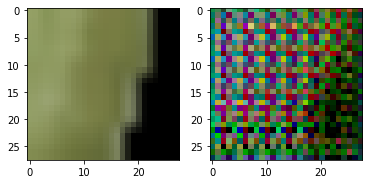

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


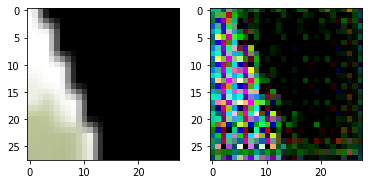

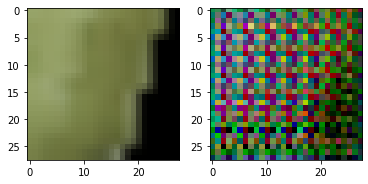

In [129]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(4):
    plt.subplot(1,2,1)
    plt.imshow(image[i].permute(1, 2, 0).cpu().numpy())
    plt.subplot(1,2,2)
    plt.imshow(out_img[i].permute(1, 2, 0).numpy())
    plt.show()

In [130]:
with torch.no_grad():
    for j,[image,label] in enumerate(valid_loader):
       
        image = image.to(device)
        output = encoder(image)
        output = decoder(output)
        
    if j % 10 == 0:
        print(loss)        

tensor(0.0777, device='cuda:0', grad_fn=<MseLossBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 3, 28, 28])


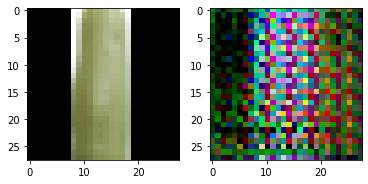

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


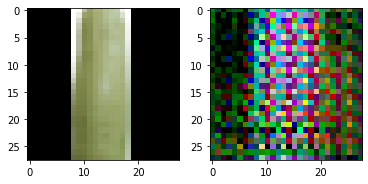

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


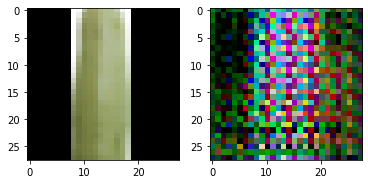

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


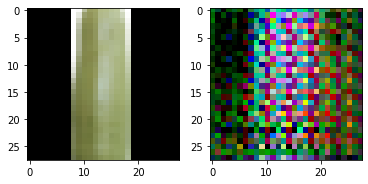

In [131]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(4):
    plt.subplot(1,2,1)
    plt.imshow(image[i].permute(1, 2, 0).cpu().numpy())
    plt.subplot(1,2,2)
    plt.imshow(out_img[i].permute(1, 2, 0).numpy())
    plt.show()